# 2. Model Building

We have a dataset ready to be worked with. Using the pickle we created, we will now try with several different predicting models to see which ones gives us the best results.

In [63]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import re
import math
import os
import pickle
import pprint
from IPython.display import display, Markdown, Latex
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.model_selection import *
import warnings
from sklearn import preprocessing
from sklearn import utils


#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# ensemble models
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [107]:
with open('data/train_test.pickle', 'rb') as file:
    dataset_list = pickle.load(file)
    
X_train = dataset_list[0]
X_test = dataset_list[1]
y_train = dataset_list[2]
y_test = dataset_list[3]

The models we will be trying are:
- Logistic Regression
- K-Neighbors Classifier
- Decision Tree Classifier
- XGBoost
- Random Forest Classifier

In [141]:
num_folds = 10
seed = 1
scoring = 'roc_auc'
models = []
# basic models
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-Neighbors Classifier', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))

# ensemble models
models.append(('XGBoost', XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')))
models.append(('Random Forest', RandomForestClassifier()))

# KFolds for model selection:
table_results = []
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    for name, model in tqdm(models):
        kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        table_results.append([name,cv_results.mean(),cv_results.std()])

pd.DataFrame(table_results, columns=['Model', 'Mean', 'Std']).sort_values(by = ['Mean'], ascending=False)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.94s/it]


,Model,Mean,Std
3,XGBoost,0.959365,0.003124
4,Random Forest,0.956558,0.003383
0,Logistic Regression,0.951391,0.003934
1,K-Neighbors Classifier,0.941496,0.004220
2,Decision Tree Classifier,0.864607,0.005373


We see that we get really good results for most of the models, except for the decision tree classifier, that only gives around 86% accuracy (the next best one is already at 94% accuracy). For this reason we will not be further using the Decision Tree Classifier.

In [144]:
#removing the Decision tree classifier from our list of models
if(models[2][0] == 'Decision Tree Classifier'):
    del(models[2])

[('Logistic Regression', LogisticRegression()),
 ('K-Neighbors Classifier', KNeighborsClassifier()),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None,
                enable_categorical=False, eval_metric='mlogloss', gamma=None,
                gpu_id=None, importance_type=None, interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, reg_alpha=None,
                reg_lambda=None, scale_pos_weight=None, subsample=None,
                tree_method=None, use_label_encoder=False,
                validate_parameters=None, verbosity=None)),
 ('Random Forest', RandomForestClassifier())]

### Feature importance for the best models

#### Feature importance for XGBoost Classifier

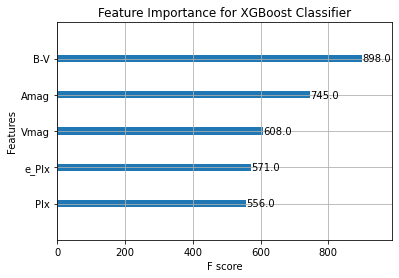

In [148]:
xgb_clf = models[2][1].fit(X_train, y_train)
xgb.plot_importance(booster=xgb_clf, title='Feature Importance for XGBoost Classifier');

#### Feature importance for Random Forest Classifier

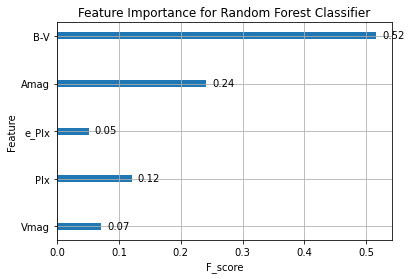

In [192]:
rf_clf = models[3][1].fit(X_train, y_train)

x_axis = X_train.columns
y_axis = rf_clf.feature_importances_
plt.barh(x_axis, y_axis, height=0.15)
plt.title('Feature Importance for Random Forest Classifier')
plt.ylabel('Feature')
plt.xlabel('F_score')
plt.grid()
for i, v in enumerate(y_axis):
    plt.text(v+0.01, i-0.05, str(round(v, 2)), color='black')
plt.show()